In [81]:
import requests
from bs4 import BeautifulSoup
import pickle


def url_to_transcript(url):
    page = requests.get(url)
    #print(page)
    soup = BeautifulSoup(page.text, 'html.parser')
    text = [p.text for p in soup.find(class_ ="post-body-container").find_all(class_="post-body entry-content float-container")]
    #print(url)
    #print(text)
    return text


                         
urls= ['http://growtechnrg.blogspot.com/2020/01/winners-should-keep-learning.html',
      'http://growtechnrg.blogspot.com/2019/12/email-tools-to-help-you-organize-your.html',
      'http://growtechnrg.blogspot.com/2019/10/automation-tasks-by-programming-with.html']
                         

transcripts = [url_to_transcript(u) for u in urls]
#print(transcripts)

title = ['winner', 'email', 'automation']

for u in urls:
    url_to_transcript(u)


data = {}
print(data.keys())
for i,c in enumerate(title):
    print(i,c)
    with open('transcripts/' +c+ ".txt", 'rb') as file:
        data[c] = pickle.load(file)
        file.close()
        
data.keys()
data['email'][:2]

def combine_text(list_of_text):
    combined_text= ' '.join(list_of_text)
    return combined_text


data_combined = {key:[combine_text(value)] for (key, value) in data.items()}
import pandas as pd
pd.set_option('max_colwidth', 150)
data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns= ['transcripts']
data_df = data_df.sort_index()
data_df



dict_keys([])
0 winner
1 email
2 automation


,transcripts
automation,\n\n\n\n\n\n\nPython scripts are designed to be run on the\ncommand line on UNIX / LINUX based systems. They include commands and\ninstructions to...
email,"\n\n\nWhile the world has moved on to team chat apps and social networksnetworks, are you still struggling with prioritizing email repliesrepliesr..."
winner,"\n\n\nAlways it is simple when you get the meaning of anything in the way you expect, that keep applies towards learning programming. There's a ..."


In [82]:

import re
import string
def clean_text_round1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'', text)
    text = re.sub('\w*\d\w*', '', text)
   # print(text)
    return text

round1 = lambda x: clean_text_round1(x)

data_clean= pd.DataFrame(data_df.transcripts.apply(round1))
data_clean






,transcripts
automation,\n\n\n\n\n\n\npython scripts are designed to be run on the\ncommand line on unix linux based systems they include commands and\ninstructions to p...
email,\n\n\nwhile the world has moved on to team chat apps and social networksnetworks are you still struggling with prioritizing email repliesrepliesre...
winner,\n\n\nalways it is simple when you get the meaning of anything in the way you expect that keep applies towards learning programming theres a hug...


In [83]:
def clean_text_round2(text = data_clean.transcripts):
    text = text.lower()
    text = re.sub('['""'_]', '', text)
    text = re.sub('\n', '', text)
    return text
    
round2 = lambda x: clean_text_round2(x)
data_clean= pd.DataFrame(data_df.transcripts.apply(round2))
data_clean

,transcripts
automation,python scripts are designed to be run on thecommand line on unix / linux based systems. they include commands andinstructions to perform specific ...
email,"while the world has moved on to team chat apps and social networksnetworks, are you still struggling with prioritizing email repliesrepliesreplies..."
winner,"always it is simple when you get the meaning of anything in the way you expect, that keep applies towards learning programming. there's a huge g..."


In [84]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english', min_df=2, max_df=10)
data_cv = cv.fit_transform(data_clean.transcripts)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm
data_dtm.to_pickle('dtm.pkl')
data_dtm


,application,applications,based,better,code,comfortable,concepts,data,easily,efficient,...,python,required,requirements,self,software,specific,tasks,tools,way,world
automation,8,6,3,1,14,1,2,3,1,1,...,40,2,1,1,8,3,6,4,2,0
email,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
winner,1,0,1,1,2,1,1,1,1,1,...,2,1,1,2,1,1,1,0,1,2


In [85]:
data_clean.to_pickle('data_clean.pkl')
pickle.dump(cv,open('cv.pkl',"wb"))

In [86]:
import pandas as pd
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
    
for title,top_words in top_dict.items():
    print(title)
    print(', '.join([word for word,count in top_words[0:14]]))
    print('---')
    
from collections import Counter
words =[]
for title in data.columns:
    top =[word for (word, count)in top_dict[title]]
    for t in top:
        words.append(t)
        

Counter(words).most_common()

automation
python, code, programming, software, application, language, applications, tasks, tools, languages, specific, based, program, data
---
email
world, tools, applications, know, manage, efficient, java, internet, instructions, helps, data, easily, languages, concepts
---
winner
programming, make, language, world, self, python, code, comfortable, concepts, data, better, easily, efficient, helps
---


[('python', 3),
 ('code', 3),
 ('programming', 3),
 ('language', 3),
 ('languages', 3),
 ('based', 3),
 ('program', 3),
 ('data', 3),
 ('make', 3),
 ('way', 3),
 ('concepts', 3),
 ('instructions', 3),
 ('latest', 3),
 ('required', 3),
 ('needs', 3),
 ('making', 3),
 ('lot', 3),
 ('modern', 3),
 ('better', 3),
 ('comfortable', 3),
 ('easily', 3),
 ('efficient', 3),
 ('software', 2),
 ('applications', 2),
 ('tools', 2),
 ('self', 2),
 ('requirements', 2),
 ('world', 2),
 ('know', 2),
 ('java', 2),
 ('internet', 2),
 ('helps', 2),
 ('application', 1),
 ('tasks', 1),
 ('specific', 1),
 ('manage', 1)]

In [61]:
from collections import Counter
words =[]
for title in data.columns:
    top =[word for (word, count)in top_dict[title]]
    for t in top:
        words.append(t)
        
st_words = Counter(words).most_common()
add_stop_words = [word for word,count in st_words if count >2]
add_stop_words

['python',
 'code',
 'programming',
 'language',
 'languages',
 'based',
 'program',
 'data',
 'make',
 'way',
 'concepts',
 'instructions',
 'latest',
 'required',
 'needs',
 'making',
 'lot',
 'modern',
 'better',
 'comfortable',
 'easily',
 'efficient']

In [87]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

data_clean = pd.read_pickle('data_clean.pkl')

stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

cv = CountVectorizer(stop_words='english', min_df=2, max_df=10)
data_cv = cv.fit_transform(data_clean.transcripts)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle('dtn_stop.pkl')


In [88]:
from wordcloud import WordCloud
wc = WordCloud(stopwords= stop_words, background_color="white", colormap="Dark2", max_font_size=150, random_state=42)


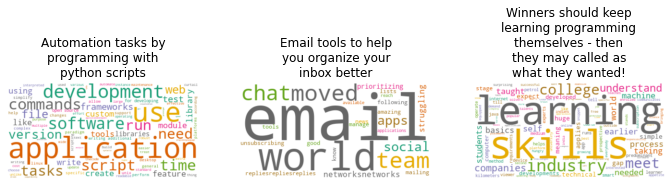

In [99]:
import matplotlib.pyplot as plt
import textwrap
plt.rcParams['figure.figsize']= [16,6]
title_nam = ['Automation tasks by programming with python scripts', 'Email tools to help you organize your inbox better', 'Winners should keep learning programming themselves - then they may called as what they wanted!']
for index, title in enumerate(data.columns):
    wc.generate(data_clean.transcripts[title])
    plt.subplot(3,4, index+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    #plt.title(title_nam[index])
    plt.title(textwrap.fill(title_nam[index],20))
    
plt.show()

In [101]:
unique_list=[]
for title in data.columns:
    uniques = data[title].size
    unique_list.append(uniques)
    
data_words= pd.DataFrame(list(zip(title_nam, unique_list)), columns=['Titles',
                                                                'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort
                         

,Titles,unique_words
0,Automation tasks by programming with python scripts,36
1,Email tools to help you organize your inbox better,36
2,Winners should keep learning programming themselves - then they may called as what they wanted!,36


In [102]:
total_list =[]
for title in data.columns:
    totals = sum(data[title])
    total_list.append(totals)
    

run_times = [60,59,80]

data_words['total_words']= total_list
data_words['run_times']= run_times
data_words['words_per_minute'] = data_words['total_words']/ data_words['run_times']

data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort


,Titles,unique_words,total_words,run_times,words_per_minute
1,Email tools to help you organize your inbox better,36,5,59,0.084746
2,Winners should keep learning programming themselves - then they may called as what they wanted!,36,49,80,0.612500
0,Automation tasks by programming with python scripts,36,149,60,2.483333
